In [21]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


actuals = pd.read_pickle("loaded_variables/actuals_hourly_DK1_fixed.pkl")
ensembles_DK1_onshorewindpower = pd.read_pickle("loaded_variables/ensembles_wind_onshore_DK1_fixed.pkl")
ensembles_DK1_offshorewindpower = pd.read_pickle("loaded_variables/ensembles_wind_offshore_DK1_fixed.pkl")
ensembles_DK1_solarpower = pd.read_pickle("loaded_variables/ensembles_solar_DK1_fixed_v2.pkl")

Y_DK1_OnshoreWindPower = actuals["OnshoreWindPower"]
Y_DK1_OffshoreWindPower = actuals["OffshoreWindPower"]
Y_DK1_SolarPower = actuals["SolarPower"]

actuals = pd.read_pickle("loaded_variables/actuals_hourly_DK2_fixed.pkl")
ensembles_DK2_onshorewindpower = pd.read_pickle("loaded_variables/ensembles_wind_onshore_DK2_fixed.pkl")
ensembles_DK2_offshorewindpower = pd.read_pickle("loaded_variables/ensembles_wind_offshore_DK2_fixed.pkl")
ensembles_DK2_solarpower = pd.read_pickle("loaded_variables/ensembles_solar_DK2_fixed_v2.pkl")
Y_DK2_OnshoreWindPower = actuals["OnshoreWindPower"]
Y_DK2_OffshoreWindPower = actuals["OffshoreWindPower"]
Y_DK2_SolarPower = actuals["SolarPower"]

# load the corrected ensembles
Corrected_ensembles_DK1_OffshoreWindPower_lstm = pd.read_csv("results/DK1_OffshoreWindPower_lstm_corrected_ensembles_2024-05-20.csv")
Corrected_ensembles_DK1_OffshoreWindPower_lstm.set_index("HourDK", inplace=True)
Corrected_ensembles_DK1_OnshoreWindPower_lstm = pd.read_csv("results/DK1_OnshoreWindPower_lstm_corrected_ensembles_2024-05-20.csv")
Corrected_ensembles_DK1_OnshoreWindPower_lstm.set_index("HourDK", inplace=True)
Corrected_ensembles_DK1_OnshoreWindPower_lstm.index = pd.to_datetime(Corrected_ensembles_DK1_OnshoreWindPower_lstm.index)


Corrected_ensembles_DK2_OffshoreWindPower_lstm = pd.read_csv("results/DK2_OffshoreWindPower_lstm_corrected_ensembles_2024-05-20.csv")
Corrected_ensembles_DK2_OffshoreWindPower_lstm.set_index("HourDK", inplace=True)
Corrected_ensembles_DK2_OnshoreWindPower_lstm = pd.read_csv("results/DK2_OnshoreWindPower_lstm_corrected_ensembles_2024-05-20.csv")
Corrected_ensembles_DK2_OnshoreWindPower_lstm.set_index("HourDK", inplace=True)


Corrected_ensembles_DK1_OffshoreWindPower_FFNN = pd.read_csv("results/DK1_OffshoreWindPower_ffnn_corrected_ensembles_2024-05-20.csv")
Corrected_ensembles_DK1_OffshoreWindPower_FFNN.set_index("HourDK", inplace=True)
Corrected_ensembles_DK1_OnshoreWindPower_FFNN = pd.read_csv("results/DK1_OnshoreWindPower_ffnn_corrected_ensembles_2024-05-20.csv")
Corrected_ensembles_DK1_OnshoreWindPower_FFNN.set_index(pd.to_datetime(Corrected_ensembles_DK1_OnshoreWindPower_FFNN["HourDK"]), inplace=True)
Corrected_ensembles_DK1_OnshoreWindPower_FFNN.drop("HourDK", axis=1, inplace=True)
Corrected_ensembles_DK2_OffshoreWindPower_FFNN = pd.read_csv("results/DK2_OffshoreWindPower_ffnn_corrected_ensembles_2024-05-20.csv")
Corrected_ensembles_DK2_OffshoreWindPower_FFNN.set_index("HourDK", inplace=True)
Corrected_ensembles_DK2_OnshoreWindPower_FFNN = pd.read_csv("results/DK2_OnshoreWindPower_ffnn_corrected_ensembles_2024-05-20.csv")
Corrected_ensembles_DK2_OnshoreWindPower_FFNN.set_index("HourDK", inplace=True)

Corrected_ensembles_DK1_SolarPower_FFNN = pd.read_csv("results/DK1_SolarPower_ffnn_corrected_ensembles_2024-06-11.csv", index_col=0)
Corrected_ensembles_DK1_SolarPower_FFNN.index = pd.to_datetime(Corrected_ensembles_DK1_SolarPower_FFNN.index)
Corrected_ensembles_DK1_SolarPower_FFNN.set_index(Corrected_ensembles_DK1_SolarPower_FFNN.index, inplace=True)
Corrected_ensembles_DK2_SolarPower_FFNN = pd.read_csv("results/DK2_SolarPower_ffnn_corrected_ensembles_2024-06-11.csv", index_col=0)
Corrected_ensembles_DK2_SolarPower_FFNN.index = pd.to_datetime(Corrected_ensembles_DK2_SolarPower_FFNN.index)
Corrected_ensembles_DK2_SolarPower_FFNN.set_index(Corrected_ensembles_DK2_SolarPower_FFNN.index, inplace=True)


In [2]:
def legend_without_duplicate_labels(ax):
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique))
# USE LIKE legend_without_duplicate_labels(plt.gca())

In [3]:
from functions_for_TAQR import one_step_quantile_prediction

def run_taqr(corrected_ensembles, actuals, quantiles, n_init, n_full):
    # Clean for NaNs
    actuals[np.isnan(actuals)] = 0

    y_pred_list = []
    y_actual_list = []

    for q in quantiles:
        print("running TAQR for quantile: ", q)
        y_pred, y_actual, _ = one_step_quantile_prediction(corrected_ensembles, actuals, n_init=n_init, n_full=n_full, quantile=q, already_correct_size = True)
        y_pred_list.append(y_pred)
        y_actual_list.append(y_actual)

    return y_pred_list, y_actual_list

In [4]:
print(Corrected_ensembles_DK1_OffshoreWindPower_FFNN.shape)
print(Y_DK1_OffshoreWindPower.shape)
print(ensembles_DK1_offshorewindpower.shape)

(1498, 50)
(18720,)
(18744, 52)


In [5]:
quantiles = [0.1,0.5, 0.9]
n_init = 500
n_full = 1500 # TODO should these be chosen more carefully?

corrected_ensembles = Corrected_ensembles_DK1_OffshoreWindPower_FFNN
original_ensembles = ensembles_DK1_offshorewindpower.loc[corrected_ensembles.index]
Y_values = Y_DK1_OffshoreWindPower.loc[corrected_ensembles.index]


y_pred_corrected, y_actual_corrected = run_taqr(corrected_ensembles, Y_values, quantiles, n_init, n_full)
y_pred_original, y_actual_original = run_taqr(original_ensembles, Y_values, quantiles, n_init, n_full)




running TAQR for quantile:  0.1


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve

Rows: 500 Columns: 24
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (24): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 500 Columns: 1
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (1): y

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


There is:  0 zeros in residuals and 24 close to zeroes
p:  24
24 r_init zeros


ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 1498 and the array at index 2 has size 1500

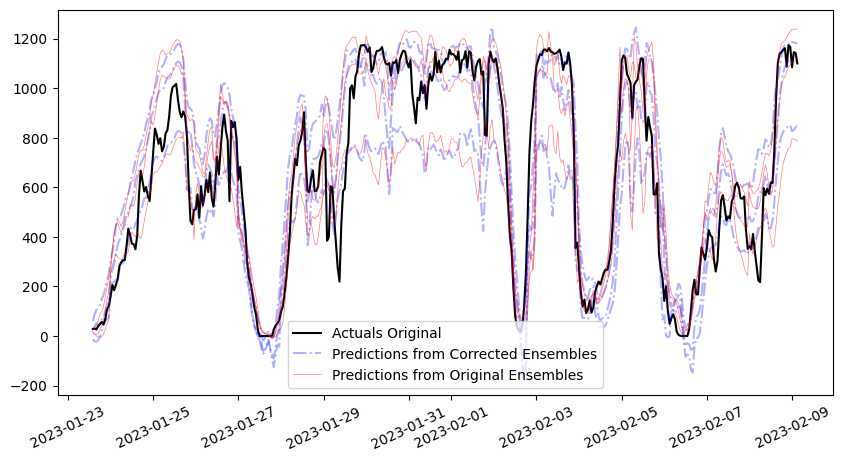

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(pd.Series(index = pd.DatetimeIndex(corrected_ensembles.index[(n_init+1):(n_full-1)]), data = y_actual_original[0]), label="Actuals Original", color = "black")
# plt.plot(y_actual_corrected[0], label="Actuals Corrected")
for i, q in enumerate(quantiles):
    plt.plot(pd.Series(index = pd.DatetimeIndex(corrected_ensembles.index[(n_init+1):(n_full-1)]), data = y_pred_corrected[i]), label="Predictions from Corrected Ensembles", color = "blue", linestyle = "-.", alpha = 0.3)
    plt.plot(pd.Series(index = pd.DatetimeIndex(corrected_ensembles.index[(n_init+1):(n_full-1)]), data = y_pred_original[i]), label="Predictions from Original Ensembles", color = "red", linewidth = 0.5, alpha = 0.5)

legend_without_duplicate_labels(plt.gca())
plt.xticks(rotation=25)
# plt.savefig("figures/TAQR_example_corrected_vs_original_05062024.pdf")

In [18]:
import numpy as np
import pandas as pd
from pipeline_start_to_finish import calculate_qss, calculate_crps, calculate_variogram_score

# Assuming you have the necessary data loaded in y_actual_corrected, y_pred_corrected, y_actual_original, y_pred_original, quantiles

# Calculate scores
# qss_scores_corrected = calculate_qss(y_actual_corrected[0], y_pred_corrected, quantiles=np.array(quantiles))
# qss_scores_original = calculate_qss(y_actual_original[0], y_pred_original, quantiles=np.array(quantiles))

# crps_score_corrected = calculate_crps(y_actual_corrected[0], pd.DataFrame(y_pred_corrected).T)
# crps_score_original = calculate_crps(y_actual_original[0], pd.DataFrame(y_pred_original).T)

# variogram_score_corrected = calculate_variogram_score(pd.DataFrame(y_pred_corrected).T.to_numpy(), y_actual_corrected[0])
# variogram_score_original = calculate_variogram_score(pd.DataFrame(y_pred_original).T.to_numpy(), y_actual_original[0])

# # Print scores
# print("QSS Scores Corrected:", qss_scores_corrected)
# print("QSS Scores Original:", qss_scores_original)
# print("CRPS Score Corrected:", crps_score_corrected)
# print("CRPS Score Original:", crps_score_original)
# print("Variogram Score Corrected:", variogram_score_corrected)
# print("Variogram Score Original:", variogram_score_original)

# # Generate LaTeX code
# latex_code = f"""
# \\begin{{table}}[h!]
# \\centering
# \\begin{{tabular}}{{|l|c|c|}}
# \\hline
# \\textbf{{}} & \\textbf{{Corrected}} & \\textbf{{Original}} \\\\ \\hline
# CRPS       & {crps_score_corrected:.2f}       & {crps_score_original:.2f}      \\\\ \\hline
# Variogram  & {variogram_score_corrected:.2f}  & {variogram_score_original:.2f} \\\\ \\hline
# Mean QSS   & {np.mean(qss_scores_corrected):.2f}        & {np.mean(qss_scores_original):.2f}       \\\\ \\hline
# \\end{{tabular}}
# \\caption{{TAQR Prediction Scores for DK1 Offshore Wind Power FFNN Corrected vs Original Ensembles}}
# \\label{{tab:comparison}}
# \\end{{table}}

# """

# # Save to file
# with open("comparison_table.tex", "w") as file:
#     file.write(latex_code)

# print("LaTeX code generated and saved to comparison_table.tex")

In [19]:
def TAQR_comp_function(corrected_ensembles, Y_values, datasource, type_of_nn, quantiles, n_init, n_full):


    y_pred_corrected, y_actual_corrected = run_taqr(corrected_ensembles, Y_values, quantiles, n_init, n_full)
    y_pred_original, y_actual_original = run_taqr(original_ensembles, Y_values, quantiles, n_init, n_full)

    for i in range(len(y_pred_corrected)):
        y_pred_corrected[i] = np.array(y_pred_corrected[i])
        y_pred_corrected[i][y_pred_corrected[i] < 0] = 0
    

    plt.figure(figsize=(10,5))
    plt.plot(pd.Series(index = pd.DatetimeIndex(corrected_ensembles.index[(n_init+1):(n_full-1)]), data = y_actual_original[0]), label="Actuals Original", color = "black")
    # plt.plot(y_actual_corrected[0], label="Actuals Corrected")
    for i, q in enumerate(quantiles):
        plt.plot(pd.Series(index = pd.DatetimeIndex(corrected_ensembles.index[(n_init+1):(n_full-1)]), data = y_pred_corrected[i]), label="Predictions from Corrected Ensembles", color = "blue", linestyle = "-.", alpha = 0.3)
        plt.plot(pd.Series(index = pd.DatetimeIndex(corrected_ensembles.index[(n_init+1):(n_full-1)]), data = y_pred_original[i]), label="Predictions from Original Ensembles", color = "red", linewidth = 0.5, alpha = 0.5)

    legend_without_duplicate_labels(plt.gca())
    plt.xticks(rotation=25)
    plt.savefig(f"figures/TAQR_example_corrected_vs_original_{datasource}.pdf")

    qss_scores_corrected = calculate_qss(y_actual_corrected[0], y_pred_corrected, quantiles=np.array(quantiles))
    qss_scores_original = calculate_qss(y_actual_original[0], y_pred_original, quantiles=np.array(quantiles))

    crps_score_corrected = calculate_crps(y_actual_corrected[0], pd.DataFrame(y_pred_corrected).T)
    crps_score_original = calculate_crps(y_actual_original[0], pd.DataFrame(y_pred_original).T)

    variogram_score_corrected = calculate_variogram_score(pd.DataFrame(y_pred_corrected).T.to_numpy(), y_actual_corrected[0])
    variogram_score_original = calculate_variogram_score(pd.DataFrame(y_pred_original).T.to_numpy(), y_actual_original[0])

    latex_code = f"""
    \\begin{{table}}[h!]
    \\centering
    \\begin{{tabular}}{{|l|c|c|}}
    \\hline
    \\textbf{{}} & \\textbf{{Corrected}} & \\textbf{{Original}} \\\\ \\hline
    CRPS       & {crps_score_corrected:.2f}       & {crps_score_original:.2f}      \\\\ \\hline
    Variogram  & {variogram_score_corrected:.2f}  & {variogram_score_original:.2f} \\\\ \\hline
    Mean QSS   & {np.mean(qss_scores_corrected):.2f}        & {np.mean(qss_scores_original):.2f}       \\\\ \\hline
    \\end{{tabular}}
    \\caption{{TAQR Prediction Scores for {datasource} with {type_of_nn} Corrected vs Original Ensembles}}
    \\label{{tab:comparison}}
    \\end{{table}}
    """

    # Save to file
    with open(f"comparison_table_{datasource}_{type_of_nn}.tex", "w") as file:
        file.write(latex_code)

    print("Function ran correctly for ", datasource, " with ", type_of_nn, " as the neural network type")


corrected_ensembles = Corrected_ensembles_DK1_OffshoreWindPower_FFNN
original_ensembles = ensembles_DK1_offshorewindpower.loc[corrected_ensembles.index]
Y_values = Y_DK1_OffshoreWindPower.loc[corrected_ensembles.index]
quantiles = [0.1,0.5, 0.9]
n_init = 500
n_full = 1400 
#TAQR_comp_function(corrected_ensembles, Y_values, "DK1_OffshoreWindPower", "FFNN", quantiles, n_init, n_full)

    

running TAQR for quantile:  0.1


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve

Rows: 500 Columns: 24
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (24): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 500 Columns: 1
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (1): y

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


There is:  0 zeros in residuals and 24 close to zeroes
p:  24
24 r_init zeros
running TAQR for quantile:  0.5


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve

Rows: 500 Columns: 24
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (24): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 500 Columns: 1
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (1): y

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


There is:  0 zeros in residuals and 24 close to zeroes
p:  24
24 r_init zeros
running TAQR for quantile:  0.9


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve

Rows: 500 Columns: 24
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (24): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 500 Columns: 1
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (1): y

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


There is:  0 zeros in residuals and 24 close to zeroes
p:  24
24 r_init zeros
running TAQR for quantile:  0.1


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve

Rows: 500 Columns: 25
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (25): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 500 Columns: 1
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (1): y

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


There is:  0 zeros in residuals and 25 close to zeroes
p:  25
25 r_init zeros
running TAQR for quantile:  0.5


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve

Rows: 500 Columns: 25
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (25): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 500 Columns: 1
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (1): y

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


There is:  0 zeros in residuals and 25 close to zeroes
p:  25
25 r_init zeros
running TAQR for quantile:  0.9


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve

Rows: 500 Columns: 25
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (25): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 500 Columns: 1
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (1): y

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


There is:  0 zeros in residuals and 25 close to zeroes
p:  25
25 r_init zeros
shape y_pred:  (3, 898)
shape y_true:  (898,)
shape y_pred:  (3, 898)
shape y_true:  (898,)
Function ran correctly for  DK1_OffshoreWindPower  with  FFNN  as the neural network type
running TAQR for quantile:  0.1


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve

Rows: 500 Columns: 24
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (24): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 500 Columns: 1
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (1): y

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


There is:  0 zeros in residuals and 24 close to zeroes
p:  24
24 r_init zeros
running TAQR for quantile:  0.5


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve

Rows: 500 Columns: 24
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (24): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 500 Columns: 1
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (1): y

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


There is:  0 zeros in residuals and 24 close to zeroes
p:  24
24 r_init zeros
running TAQR for quantile:  0.9


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve

Rows: 500 Columns: 24
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (24): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 500 Columns: 1
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (1): y

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


There is:  0 zeros in residuals and 24 close to zeroes
p:  24
24 r_init zeros
running TAQR for quantile:  0.1


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve

Rows: 500 Columns: 25
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (25): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 500 Columns: 1
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (1): y

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


There is:  0 zeros in residuals and 25 close to zeroes
p:  25
25 r_init zeros
running TAQR for quantile:  0.5


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve

Rows: 500 Columns: 25
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (25): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 500 Columns: 1
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (1): y

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


There is:  3 zeros in residuals and 25 close to zeroes
p:  25
25 r_init zeros
running TAQR for quantile:  0.9


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve

Rows: 500 Columns: 25
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (25): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 500 Columns: 1
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (1): y

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


There is:  0 zeros in residuals and 25 close to zeroes
p:  25
25 r_init zeros
shape y_pred:  (3, 898)
shape y_true:  (898,)
shape y_pred:  (3, 898)
shape y_true:  (898,)
Function ran correctly for  DK1_OnshoreWindPower  with  FFNN  as the neural network type
running TAQR for quantile:  0.1


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve

Rows: 500 Columns: 24
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (24): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 500 Columns: 1
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (1): y

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


There is:  0 zeros in residuals and 24 close to zeroes
p:  24
24 r_init zeros
running TAQR for quantile:  0.5


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve

Rows: 500 Columns: 24
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (24): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 500 Columns: 1
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (1): y

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


There is:  0 zeros in residuals and 24 close to zeroes
p:  24
24 r_init zeros
running TAQR for quantile:  0.9


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve

Rows: 500 Columns: 24
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (24): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 500 Columns: 1
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (1): y

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


There is:  0 zeros in residuals and 24 close to zeroes
p:  24
24 r_init zeros
running TAQR for quantile:  0.1


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve

Rows: 500 Columns: 25
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (25): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 500 Columns: 1
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (1): y

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


There is:  0 zeros in residuals and 25 close to zeroes
p:  25
25 r_init zeros
running TAQR for quantile:  0.5


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve

Rows: 500 Columns: 25
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (25): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 500 Columns: 1
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (1): y

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


There is:  2 zeros in residuals and 25 close to zeroes
p:  25
25 r_init zeros
running TAQR for quantile:  0.9


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve

Rows: 500 Columns: 25
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (25): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 500 Columns: 1
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (1): y

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


There is:  4 zeros in residuals and 25 close to zeroes
p:  25
25 r_init zeros
shape y_pred:  (3, 898)
shape y_true:  (898,)
shape y_pred:  (3, 898)
shape y_true:  (898,)
Function ran correctly for  DK2_OffshoreWindPower  with  FFNN  as the neural network type
running TAQR for quantile:  0.1


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve

Rows: 500 Columns: 24
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (24): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 500 Columns: 1
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (1): y

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


There is:  0 zeros in residuals and 24 close to zeroes
p:  24
24 r_init zeros
running TAQR for quantile:  0.5


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve

Rows: 500 Columns: 24
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (24): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 500 Columns: 1
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (1): y

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


There is:  0 zeros in residuals and 24 close to zeroes
p:  24
24 r_init zeros
running TAQR for quantile:  0.9


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve

Rows: 500 Columns: 24
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (24): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 500 Columns: 1
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (1): y

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


There is:  0 zeros in residuals and 24 close to zeroes
p:  24
24 r_init zeros
running TAQR for quantile:  0.1


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve

Rows: 500 Columns: 25
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (25): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 500 Columns: 1
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (1): y

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


There is:  4 zeros in residuals and 25 close to zeroes
p:  25
25 r_init zeros
running TAQR for quantile:  0.5


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve

Rows: 500 Columns: 25
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (25): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 500 Columns: 1
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (1): y

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


There is:  10 zeros in residuals and 25 close to zeroes
p:  25
25 r_init zeros
running TAQR for quantile:  0.9


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve

Rows: 500 Columns: 25
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (25): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 500 Columns: 1
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (1): y

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


There is:  3 zeros in residuals and 25 close to zeroes
p:  25
25 r_init zeros
shape y_pred:  (3, 898)
shape y_true:  (898,)
shape y_pred:  (3, 898)
shape y_true:  (898,)
Function ran correctly for  DK2_OnshoreWindPower  with  FFNN  as the neural network type


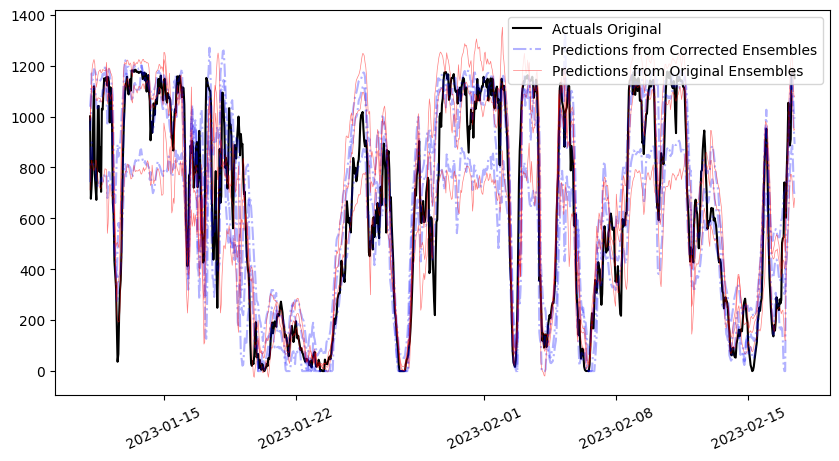

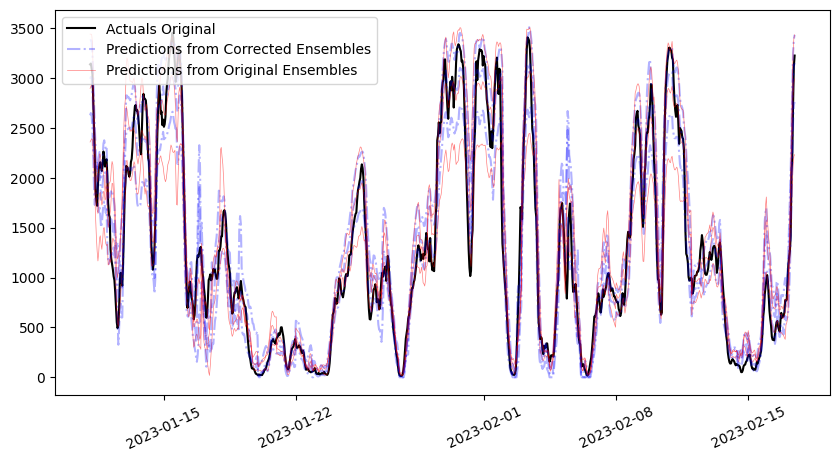

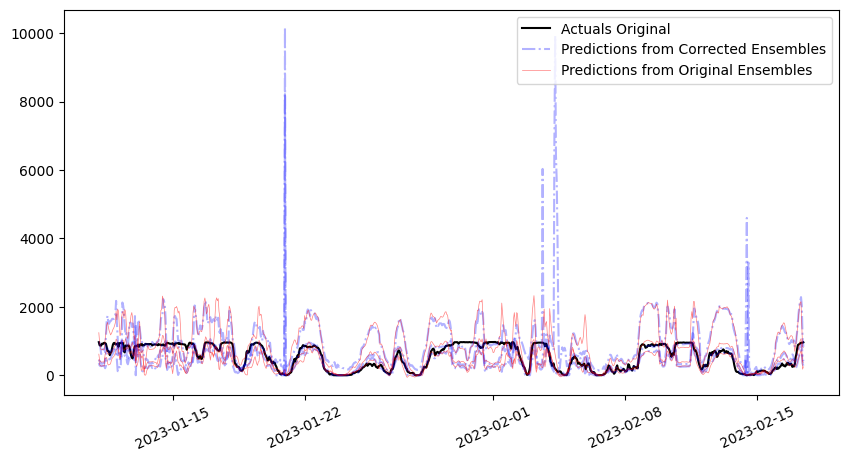

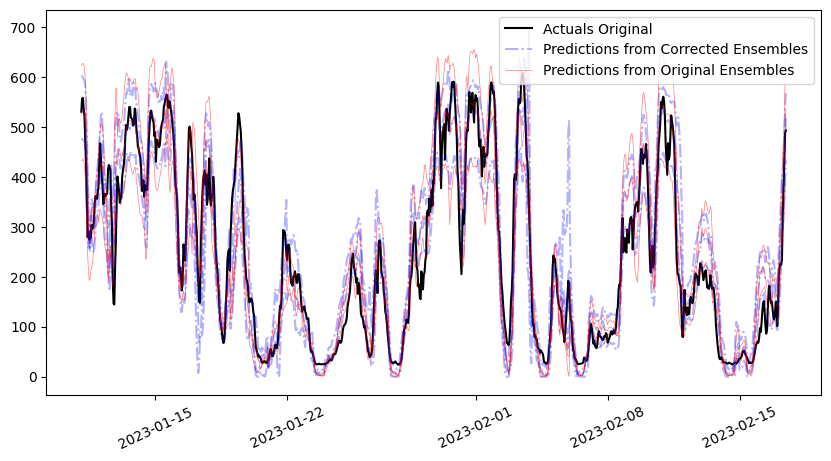

In [61]:
quantiles = [0.1,0.5, 0.9]
n_init = 500
n_full = 1400 


# DK1 Offshore Wind Power FFNN
corrected_ensembles = Corrected_ensembles_DK1_OffshoreWindPower_FFNN
original_ensembles = ensembles_DK1_offshorewindpower.loc[corrected_ensembles.index]
Y_values = Y_DK1_OffshoreWindPower.loc[corrected_ensembles.index]
TAQR_comp_function(corrected_ensembles, Y_values, "DK1_OffshoreWindPower", "FFNN", quantiles, n_init, n_full)

# DK1 Onshore Wind Power FFNN
corrected_ensembles = Corrected_ensembles_DK1_OnshoreWindPower_FFNN
original_ensembles = ensembles_DK1_onshorewindpower.loc[corrected_ensembles.index]
Y_values = Y_DK1_OnshoreWindPower.loc[corrected_ensembles.index]
TAQR_comp_function(corrected_ensembles, Y_values, "DK1_OnshoreWindPower", "FFNN", quantiles, n_init, n_full)

# DK2 Offshore Wind Power FFNN
corrected_ensembles = Corrected_ensembles_DK2_OffshoreWindPower_FFNN
original_ensembles = ensembles_DK2_offshorewindpower.loc[corrected_ensembles.index]
Y_values = Y_DK2_OffshoreWindPower.loc[corrected_ensembles.index]
TAQR_comp_function(corrected_ensembles, Y_values, "DK2_OffshoreWindPower", "FFNN", quantiles, n_init, n_full)

# DK2 Onshore Wind Power FFNN
corrected_ensembles = Corrected_ensembles_DK2_OnshoreWindPower_FFNN
original_ensembles = ensembles_DK2_onshorewindpower.loc[corrected_ensembles.index]
Y_values = Y_DK2_OnshoreWindPower.loc[corrected_ensembles.index]
TAQR_comp_function(corrected_ensembles, Y_values, "DK2_OnshoreWindPower", "FFNN", quantiles, n_init, n_full)

# # DK1 Offshore Wind Power LSTM
# corrected_ensembles = Corrected_ensembles_DK1_OffshoreWindPower_lstm
# original_ensembles = ensembles_DK1_offshorewindpower.loc[corrected_ensembles.index]
# Y_values = Y_DK1_OffshoreWindPower.loc[corrected_ensembles.index]
# TAQR_comp_function(corrected_ensembles, Y_values, "DK1_OffshoreWindPower", "LSTM", quantiles, n_init, n_full)

# # DK1 Onshore Wind Power LSTM
# corrected_ensembles = Corrected_ensembles_DK1_OnshoreWindPower_lstm
# original_ensembles = ensembles_DK1_onshorewindpower.loc[corrected_ensembles.index]
# Y_values = Y_DK1_OnshoreWindPower.loc[corrected_ensembles.index]
# TAQR_comp_function(corrected_ensembles, Y_values, "DK1_OnshoreWindPower", "LSTM", quantiles, n_init, n_full)

# # DK2 Offshore Wind Power LSTM
# corrected_ensembles = Corrected_ensembles_DK2_OffshoreWindPower_lstm
# original_ensembles = ensembles_DK2_offshorewindpower.loc[corrected_ensembles.index]
# Y_values = Y_DK2_OffshoreWindPower.loc[corrected_ensembles.index]
# TAQR_comp_function(corrected_ensembles, Y_values, "DK2_OffshoreWindPower", "LSTM", quantiles, n_init, n_full)

# # DK2 Onshore Wind Power LSTM
# corrected_ensembles = Corrected_ensembles_DK2_OnshoreWindPower_lstm
# original_ensembles = ensembles_DK2_onshorewindpower.loc[corrected_ensembles.index]
# Y_values = Y_DK2_OnshoreWindPower.loc[corrected_ensembles.index]
# TAQR_comp_function(corrected_ensembles, Y_values, "DK2_OnshoreWindPower", "LSTM", quantiles, n_init, n_full)



running TAQR for quantile:  0.1


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  0 zeros in residuals and 24 close to zeroes
p:  24
24 r_init zeros
running TAQR for quantile:  0.5


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  0 zeros in residuals and 24 close to zeroes
p:  24
24 r_init zeros
running TAQR for quantile:  0.9


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  0 zeros in residuals and 24 close to zeroes
p:  24
24 r_init zeros
running TAQR for quantile:  0.1


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  1 zeros in residuals and 25 close to zeroes
p:  25
25 r_init zeros
running TAQR for quantile:  0.5


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  0 zeros in residuals and 25 close to zeroes
p:  25
25 r_init zeros
running TAQR for quantile:  0.9


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  2 zeros in residuals and 25 close to zeroes
p:  25
25 r_init zeros
shape y_pred:  (3, 398)
shape y_true:  (398,)
shape y_pred:  (3, 398)
shape y_true:  (398,)
Function ran correctly for  DK1_SolarPower  with  FFNN  as the neural network type
running TAQR for quantile:  0.1


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  0 zeros in residuals and 24 close to zeroes
p:  24
24 r_init zeros
running TAQR for quantile:  0.5


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  0 zeros in residuals and 24 close to zeroes
p:  24
24 r_init zeros
running TAQR for quantile:  0.9


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  0 zeros in residuals and 24 close to zeroes
p:  24
24 r_init zeros
running TAQR for quantile:  0.1


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  0 zeros in residuals and 25 close to zeroes
p:  25
25 r_init zeros
running TAQR for quantile:  0.5


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  4 zeros in residuals and 25 close to zeroes
p:  25
25 r_init zeros
running TAQR for quantile:  0.9


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  1 zeros in residuals and 25 close to zeroes
p:  25
25 r_init zeros
shape y_pred:  (3, 398)
shape y_true:  (398,)
shape y_pred:  (3, 398)
shape y_true:  (398,)
Function ran correctly for  DK2_SolarPower  with  FFNN  as the neural network type


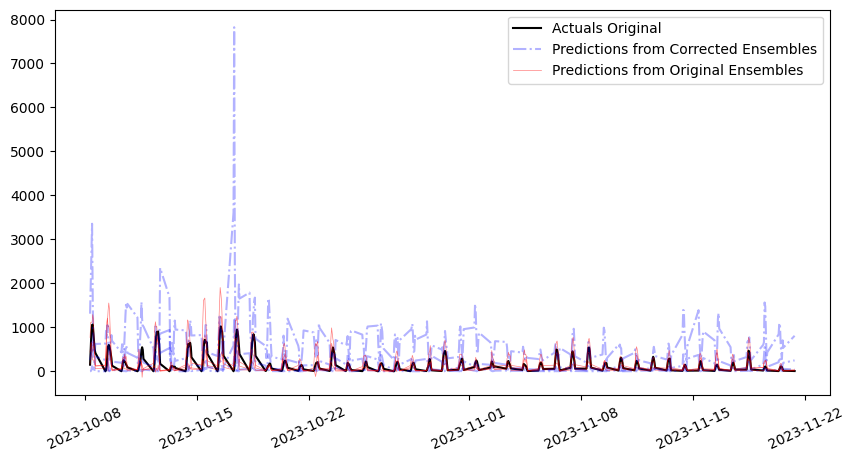

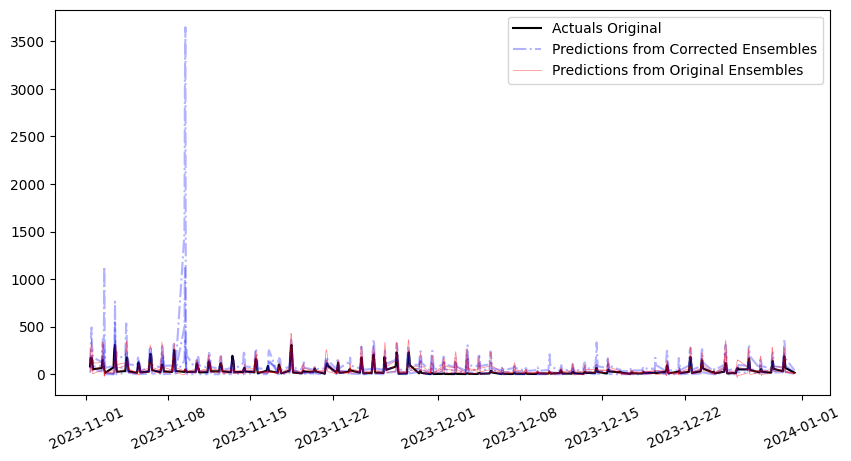

In [22]:
quantiles = [0.1,0.5, 0.9]
n_init = 500
n_full = 900


# DK1 Solar Power FFNN
corrected_ensembles = Corrected_ensembles_DK1_SolarPower_FFNN
original_ensembles = ensembles_DK1_solarpower.loc[corrected_ensembles.index]
Y_values = Y_DK1_SolarPower.loc[corrected_ensembles.index]
TAQR_comp_function(corrected_ensembles, Y_values, "DK1_SolarPower", "FFNN", quantiles, n_init, n_full)

# DK2 Solar Power FFNN
corrected_ensembles = Corrected_ensembles_DK2_SolarPower_FFNN
original_ensembles = ensembles_DK2_solarpower.loc[corrected_ensembles.index]
Y_values = Y_DK2_SolarPower.loc[corrected_ensembles.index]
TAQR_comp_function(corrected_ensembles, Y_values, "DK2_SolarPower", "FFNN", quantiles, n_init, n_full)

# ACF and PACF

running TAQR for quantile:  0.1


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve

Rows: 500 Columns: 24
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (24): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 500 Columns: 1
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (1): y

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


There is:  0 zeros in residuals and 24 close to zeroes
p:  24
24 r_init zeros
running TAQR for quantile:  0.5


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve

Rows: 500 Columns: 24
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (24): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 500 Columns: 1
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (1): y

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


There is:  0 zeros in residuals and 24 close to zeroes
p:  24
24 r_init zeros
running TAQR for quantile:  0.9


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve

Rows: 500 Columns: 24
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (24): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 500 Columns: 1
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (1): y

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


There is:  0 zeros in residuals and 24 close to zeroes
p:  24
24 r_init zeros
running TAQR for quantile:  0.1


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve

Rows: 500 Columns: 25
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (25): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 500 Columns: 1
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (1): y

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


There is:  0 zeros in residuals and 25 close to zeroes
p:  25
25 r_init zeros
running TAQR for quantile:  0.5


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve

Rows: 500 Columns: 25
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (25): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 500 Columns: 1
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (1): y

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


There is:  0 zeros in residuals and 25 close to zeroes
p:  25
25 r_init zeros
running TAQR for quantile:  0.9


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve

Rows: 500 Columns: 25
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (25): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 500 Columns: 1
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (1): y

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


There is:  0 zeros in residuals and 25 close to zeroes
p:  25
25 r_init zeros


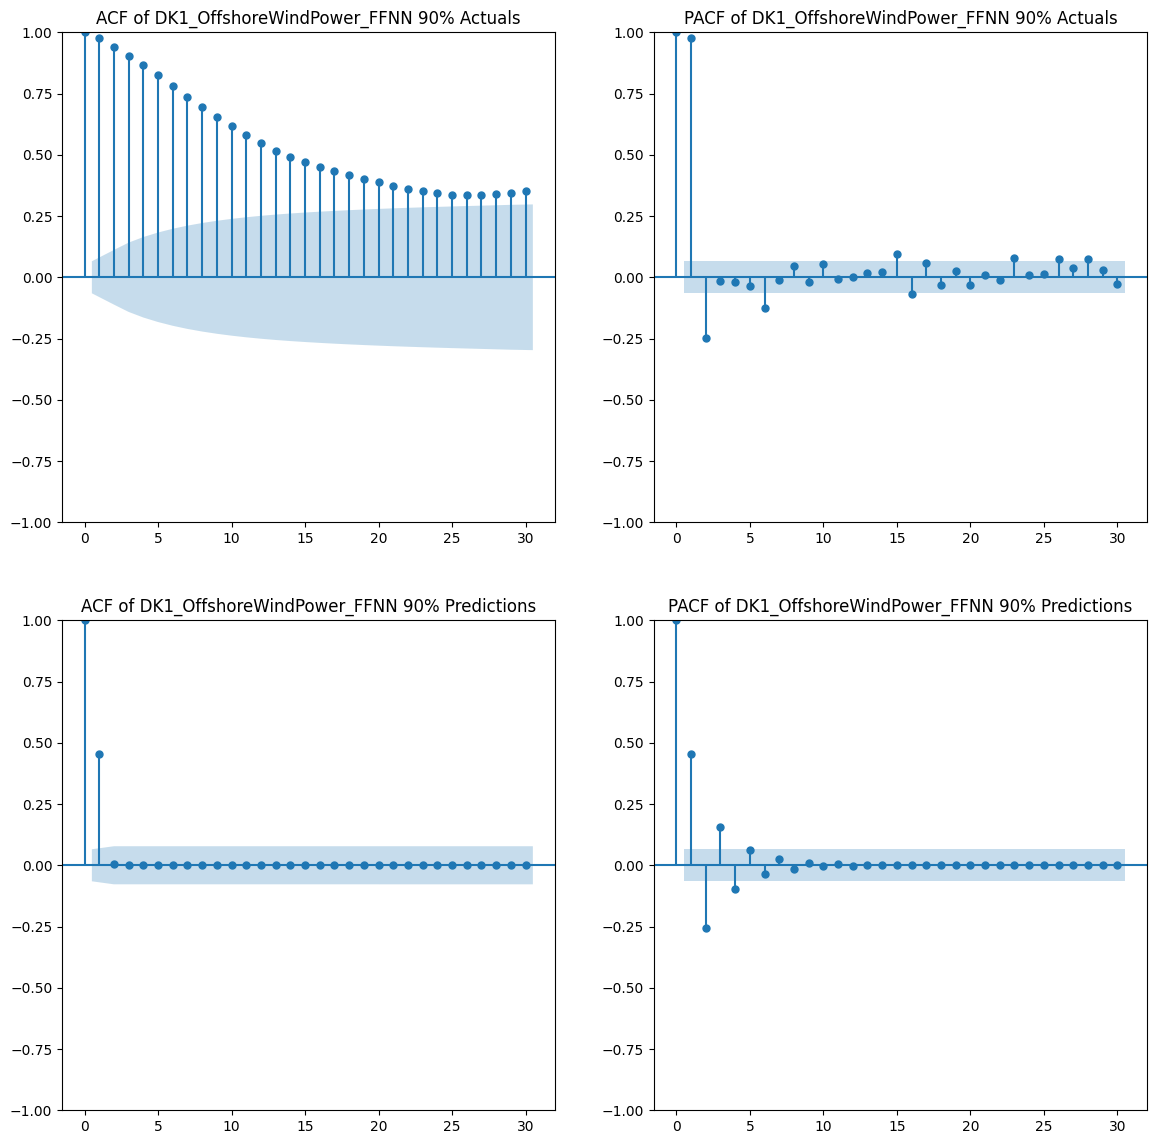

In [10]:
# calculate the acf and pacf for the corrected ensembles, original ensembles, and actuals
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
quantiles = [0.1,0.5, 0.9]
n_init = 500
n_full = 1400 
def plot_acf_pacf(y_actual, y_pred, title):
    fig, axs = plt.subplots(2, 2, figsize=(14, 14))
    plot_acf(y_actual, ax=axs[0, 0], title=f"ACF of {title} Actuals")
    plot_pacf(y_actual, ax=axs[0, 1], title=f"PACF of {title} Actuals")
    plot_acf(y_pred, ax=axs[1, 0], title=f"ACF of {title} Predictions")
    plot_pacf(y_pred, ax=axs[1, 1], title=f"PACF of {title} Predictions")
    plt.savefig(f"figures/ACF_PACF_{title}.pdf")

# DK1 Offshore Wind Power FFNN
corrected_ensembles = Corrected_ensembles_DK1_OffshoreWindPower_FFNN
original_ensembles = ensembles_DK1_offshorewindpower.loc[corrected_ensembles.index]
Y_values = Y_DK1_OffshoreWindPower.loc[corrected_ensembles.index]
y_pred_corrected, y_actual_corrected = run_taqr(corrected_ensembles, Y_values, quantiles, n_init, n_full)
y_pred_original, y_actual_original = run_taqr(original_ensembles, Y_values, quantiles, n_init, n_full)
plot_acf_pacf(y_actual_corrected[0], y_pred_corrected[2], "DK1_OffshoreWindPower_FFNN 90%")